In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from FVSimulation.Finite_volume_method_1D_gebeund import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

In [2]:
chippath = '../../DataKian/Al_LT165chip7/'
Al_data = KID_data(chippath,
                   lambda_ph_in_nm=673,
                   KIDno=2,
                   readout_power=89,
                   temp_in_mK=120,
                   length=310,
                   T_eff=0.200,
                   N0=172e8,
                   sigma_IC=5,
                   D=15000)

chippath = '../../DataKian/bTa_LT278W2chip5/'
bTa_data = KID_data(chippath,
                    lambda_ph_in_nm=673,
                    KIDno=3,
                    readout_power=96,
                    temp_in_mK=100,
                    length=90,
                    T_eff=0.100,
                    N0=303e8,
                    sigma_IC=5,
                    D=50)

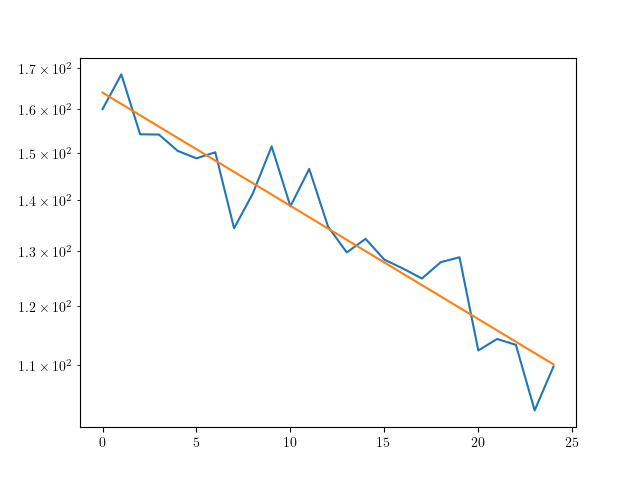

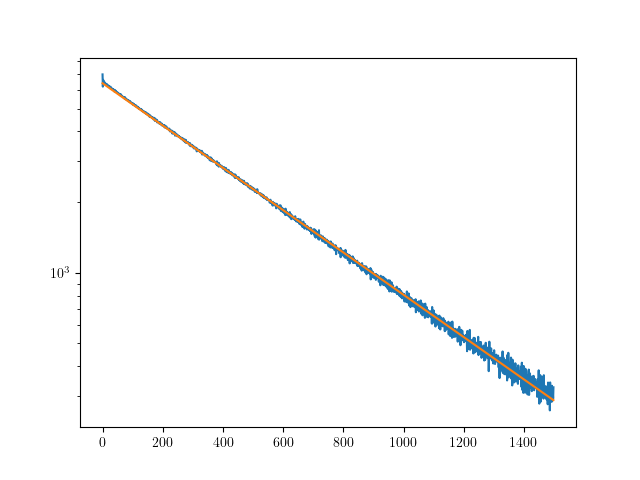

In [3]:
bTa_data.fit_tail(start=175,end=200)
Al_data.fit_tail(start=500)

In [4]:
bTa_sim=KID_sim(bTa_data,0.01,1/4,100,method='BackwardEuler')
Al_sim=KID_sim(Al_data,0.01,1/4,100,method='BackwardEuler')

100%|██████████| 10000/10000 [01:52<00:00, 89.06it/s]


0.575611085729339
0.72641084843277


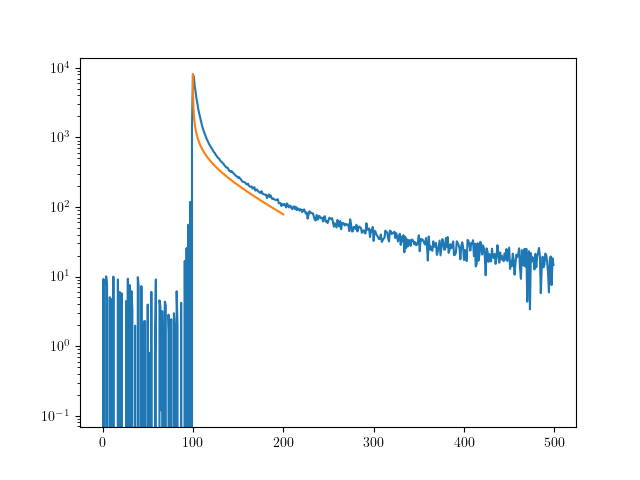

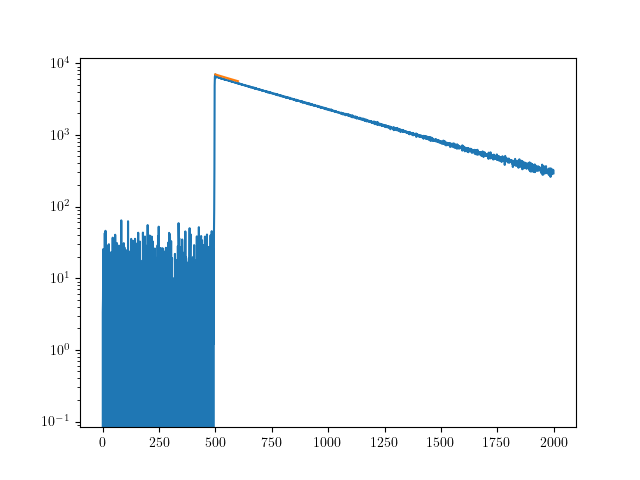

In [5]:
compbTa = sim_data_comp(bTa_data,bTa_sim)
compAl = sim_data_comp(Al_data,Al_sim)
print(bTa_data.eta_pb)
print(Al_data.eta_pb)
plt.figure()
plt.semilogy(compbTa.t_full,compbTa.Nqp_phase_data)
#plt.semilogy(compbTa.t_full,bTa_data.phase)
#plt.semilogy(compbTa.t_full,compbTa.Nqp_amp_data)
plt.plot(compbTa.t_sim_aligned,compbTa.Nqp_sim)
plt.show()
plt.figure()
plt.semilogy(compAl.t_full,compAl.Nqp_phase_data)
#plt.semilogy(compAl.t_full,compAl.Nqp_amp_data)
plt.semilogy(compAl.t_sim_aligned,compAl.Nqp_sim)
plt.show()
